# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [329]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [330]:
# Checking the number of mice.
num_mice = len(merged_data["Mouse ID"])
num_mice

1893

In [331]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_data[merged_data[['Mouse ID', 'Timepoint']].duplicated(keep=False)]

duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [332]:
# Optional: Get all the data for the duplicate mouse ID. 



In [333]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#merged_data.drop_duplicates(subset=['Mouse ID'])
clean_mouse = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse['Mouse ID'])==False]
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [334]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = len(clean_mouse["Mouse ID"])
num_mice2

1880

## Summary Statistics

In [335]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df = pd.DataFrame(clean_mouse)
means = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()




summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})

summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [336]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df = pd.DataFrame(clean_mouse)
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

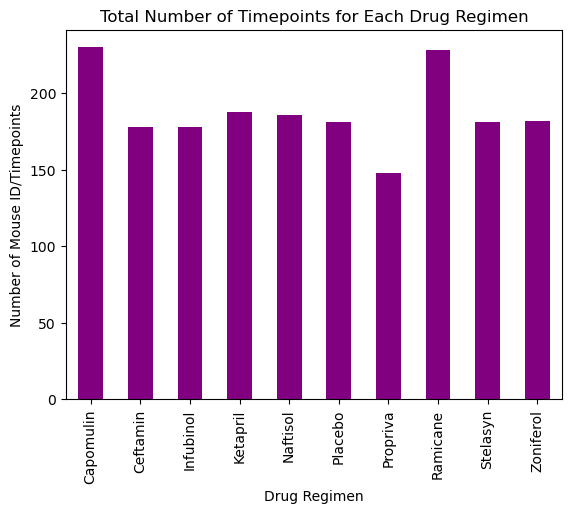

In [349]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_mouse.groupby("Drug Regimen").count()["Mouse ID"]
drug_counts.plot(kind='bar', color="purple", title="Total Number of Timepoints for Each Drug Regimen", ylabel="Number of Mouse ID/Timepoints")

plt.show()

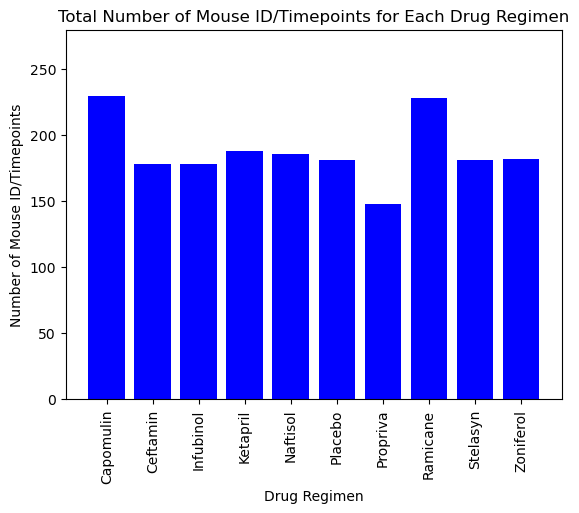

<Figure size 2000x400 with 0 Axes>

In [338]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#drug_counts.plot(kind='bar', color="purple", align="center")
drug_counts = clean_mouse.groupby("Drug Regimen").count()["Mouse ID"]
plt.bar(drug_counts.index, drug_counts, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xticks (rotation="vertical")
plt.ylim(0, max(drug_counts) + 50)
plt.figure(figsize=(20,4))

plt.show()

<Axes: title={'center': 'Gender Distribution'}, ylabel='count'>

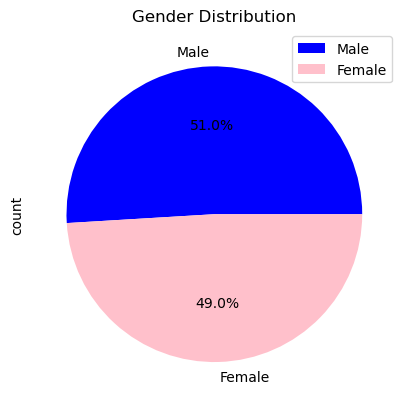

In [353]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders = clean_mouse["Sex"].value_counts()

genders.plot(kind='pie', legend=True, autopct="%1.1f%%", title=("Gender Distribution"), colors=['blue', 'pink'])

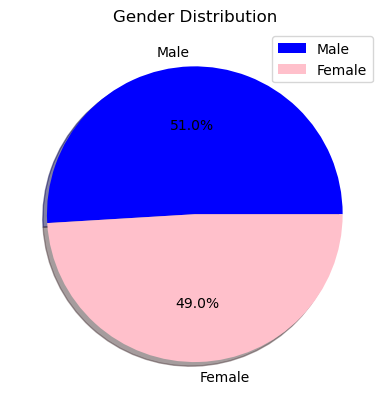

In [340]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = clean_mouse["Sex"].value_counts()
labels = ["Male", "Female"]
colors = ["blue", "pink"]
explode = (0,0)

plt.title("Gender Distribution")
plt.pie(genders, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [341]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
group = clean_mouse.groupby("Mouse ID")

drug_data = clean_mouse[clean_mouse["Drug Regimen"].isin(drugs)]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = drug_data.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(final_timepoint, clean_mouse, on=["Mouse ID", "Timepoint"], how='left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [342]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
empty_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
        tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== drug,("Tumor Volume (mm3)")]
        empty_tumor_vol.append(tumor_vol)
    # add subset 
        quartiles = tumor_vol.quantile([.25, .5, .75])
        lowerq = quartiles[.25]
        upperq = quartiles[.75]
        iqr = upperq -lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)      

    # Determine outliers using upper and lower bounds     
        outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
        print(f"{drug}'s potential outliers: {outliers} ")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 


In [343]:
empty_tumor_vol

[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

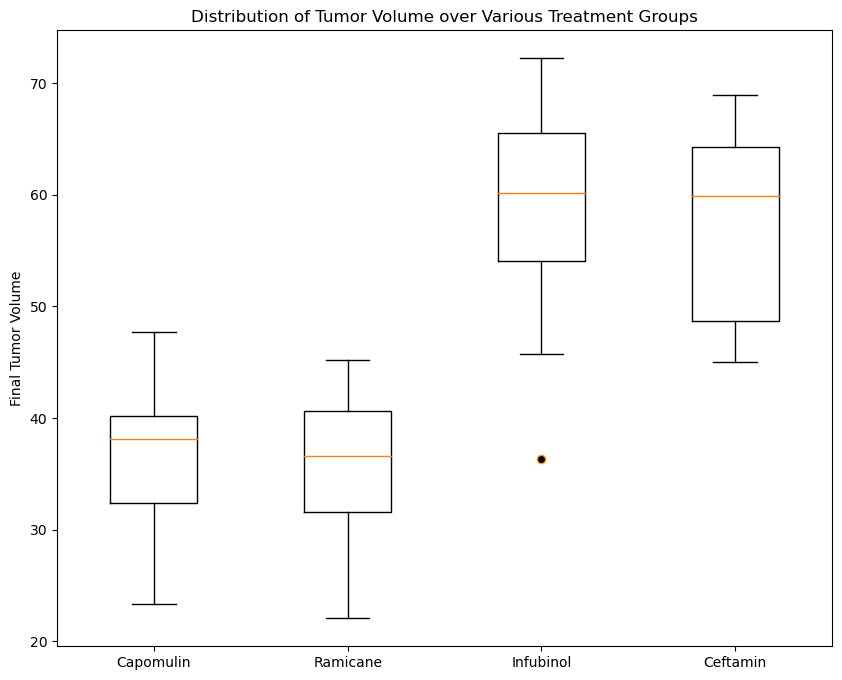

In [344]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.boxplot(empty_tumor_vol, flierprops=dict(marker='o', markerfacecolor='black', markeredgecolor='orange', alpha=1))


ax1.set_title('Distribution of Tumor Volume over Various Treatment Groups')
ax1.set_ylabel('Final Tumor Volume')
plt.xticks([1, 2, 3, 4], drugs)
flierprops=dict(color='red')
plt.show()

## Line and Scatter Plots

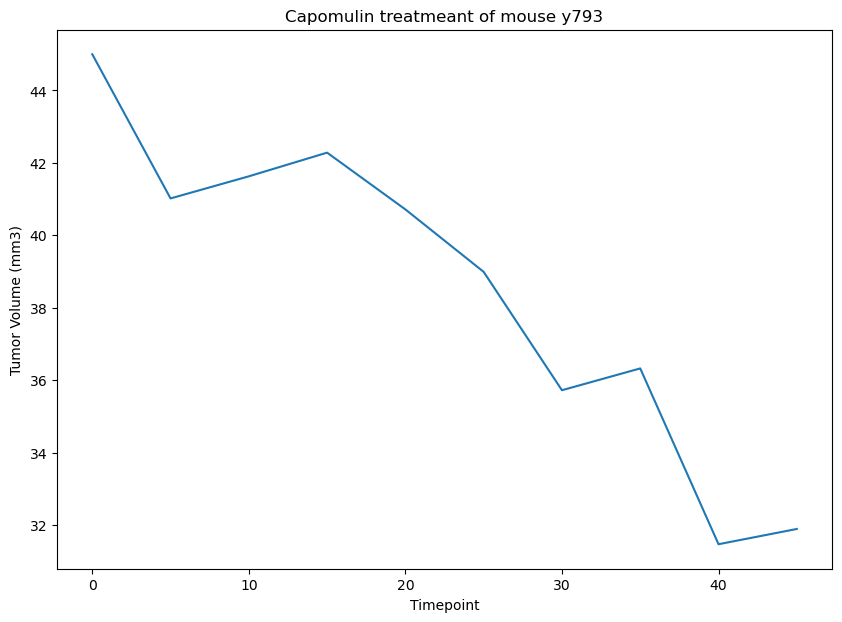

In [345]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
new_line = clean_mouse.loc[clean_mouse["Mouse ID"] == "y793", :]

time = new_line["Timepoint"]
volume = new_line["Tumor Volume (mm3)"]


plt.figure(figsize=(10,7))
plt.plot(time, volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse y793")

plt.show()

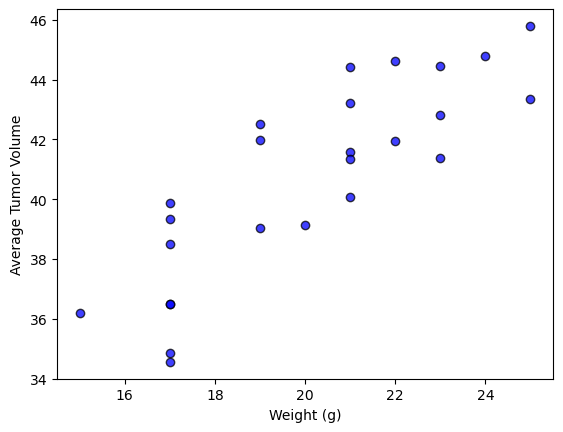

In [346]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin", :]

new_scat = cap.groupby(["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean()

weight = new_scat["Weight (g)"]
volume = new_scat["Tumor Volume (mm3)"]
plt.scatter(weight, volume, facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()


## Correlation and Regression

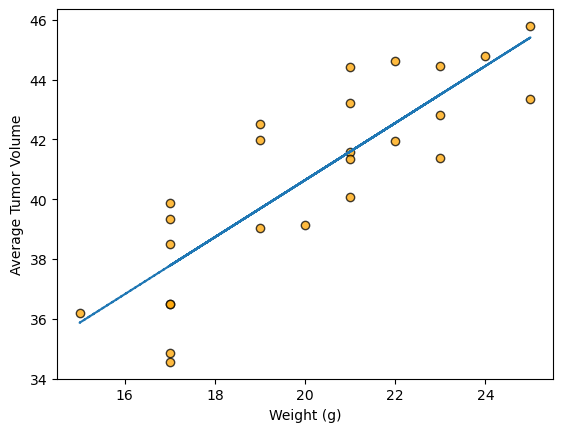

In [347]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = stats.linregress(weight, volume)
mouse_fit = mouse_slope * weight + mouse_int

plt.plot(weight, mouse_fit, "--")
plt.scatter(weight, volume, facecolors="orange", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()